# Answering the Science Question

This notebook serves as a demo for answering the science question underlying the design of my Alaska Current regional model. You can follow and/or adapt this notebook based on your science question.

For reference, the science question for my model is: **How does how does the seasons affect water volume and how does it influences the interaction between fresh water and sea water?**

First, import packages to re-create and visualize the model fields here:

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

Next, define the location of the project directory for the model:

In [2]:
# define the input directory
project_dir = '/Users/kouryl/SJSU/CS185C/Project'

Then, re-create the model grid

In [3]:
delX = 1/12
delY = 1/20
xgOrigin = -170
ygOrigin = 45
n_rows = 320
n_cols = 540

# recreate the grids that will be used in the model
xc = np.arange(xgOrigin+delX/2, xgOrigin+n_cols*delX, delX)
yc = np.arange(ygOrigin+delY/2, ygOrigin+n_rows*delY, delY)
XC, YC = np.meshgrid(xc, yc)

## Plot a model to look at SSH over time
To assess the volume, I'll plot the SSH changes in the model results:

In [4]:
grid_height = np.fromfile(os.path.join(project_dir, 'run', 'diags',
                                     'EtaN_mon_mean',
                                     'EtaN_mon_mean.0000004896.data'), '>f4')
grid_height = grid_height.reshape((n_rows,n_cols))

grid_height_2 = np.fromfile(os.path.join(project_dir, 'run', 'diags',
                                     'EtaN_mon_mean',
                                     'EtaN_mon_mean.0000048384.data'), '>f4')
grid_height_2 = grid_height_2.reshape((n_rows,n_cols))

grid_height_3 = np.fromfile(os.path.join(project_dir, 'run', 'diags',
                                     'EtaN_mon_mean',
                                     'EtaN_mon_mean.0000083808.data'), '>f4')
grid_height_3 = grid_height_3.reshape((n_rows,n_cols))


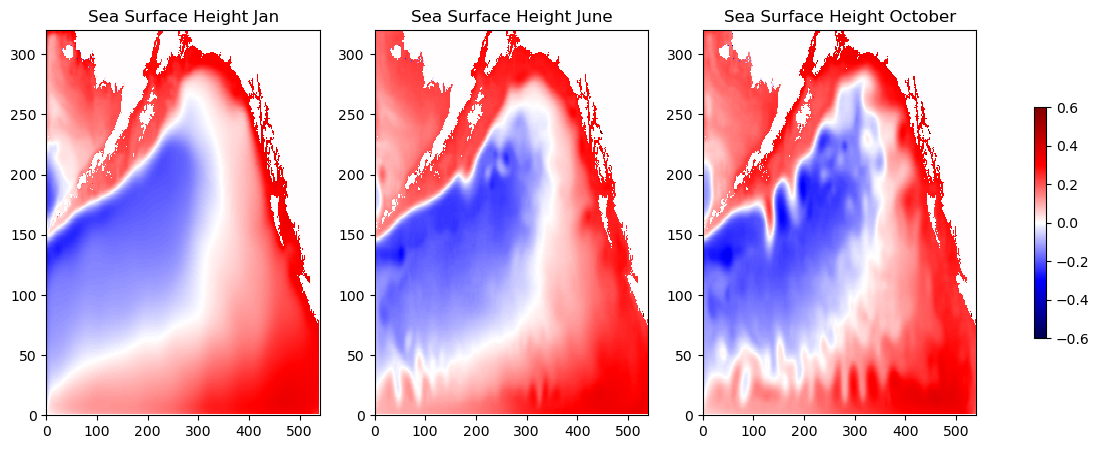

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5)) 
grid_heights = [grid_height, grid_height_2, grid_height_3]
titles = ['Sea Surface Height Jan', 'Sea Surface Height June', 'Sea Surface Height October']

# Plot each grid
for ax, data, title in zip(axes, grid_heights, titles):
    c = ax.pcolormesh(data, cmap='seismic', vmin=-.6, vmax=.6)
    ax.set_title(title)

# Shared colorbar
fig.colorbar(c, ax=axes.ravel().tolist(), shrink=0.6)
#plt.tight_layout()
plt.show()

It seems that overtime, the center is getting lower, while along the coast slowly increases in height

## Make a timeseries
Next we can see how the differences between temperature and salinity in the model is evolving through time. For this example, I'll choose a point in the domain near the coast as in my previous notebook:

In [6]:
row = 285
col = 290

Next, I'll define a quick function to convert my iteration numbers to date and time information.

In [7]:
def iter_number_to_date(iter_number,seconds_per_iter=300):
    total_seconds = iter_number*seconds_per_iter
    date = datetime(2008,1,15) + timedelta(seconds=total_seconds)
    return(date)

Then, I'll loop through all of the output files to generate a timeseries:

In [8]:
# Looking at Temperature and Salinity over the years.
timestep_dates = []
theta_values = []
salinity_values = []
for file_name in sorted(os.listdir(os.path.join(project_dir, 'run', 'diags','TS_surf_daily_mean'))):
    if file_name[-4:]=='data':
        # get the timestep number
        timestep_number = int(file_name.split('.')[-2])
        timestep_dates.append(iter_number_to_date(timestep_number))

        # read in the grid
        grid = np.fromfile(os.path.join(project_dir,'run','diags',
                                             'TS_surf_daily_mean',
                                             file_name), '>f4')
        grid = grid.reshape((2,n_rows,n_cols))

        theta_values.append(grid[0,row,col])
        salinity_values.append(grid[1,row,col])


Finally, I'll plot the timeseries to see the comparison:

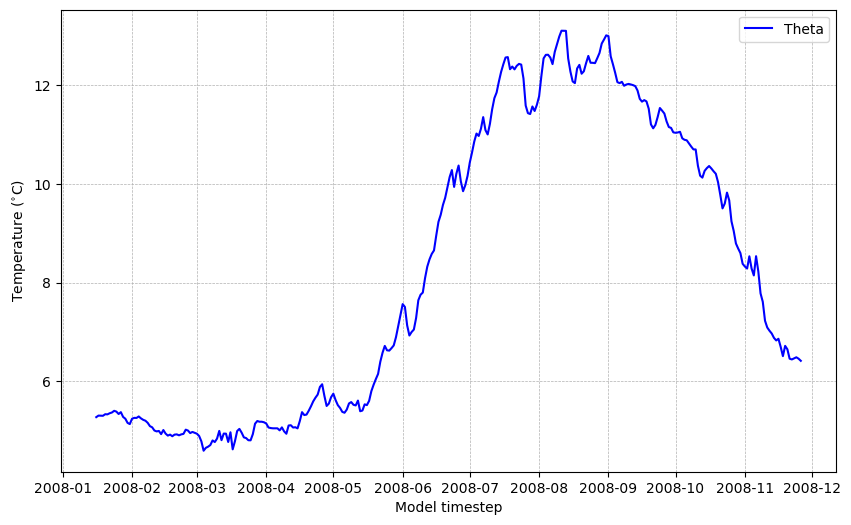

In [9]:
plt.figure(figsize=(10,6))
plt.plot(timestep_dates, theta_values,'b-',label='Theta')
plt.ylabel('Temperature ($^{\circ}$C)')
plt.xlabel('Model timestep')
plt.legend()
plt.grid(linestyle='--',linewidth=0.5)
plt.show()

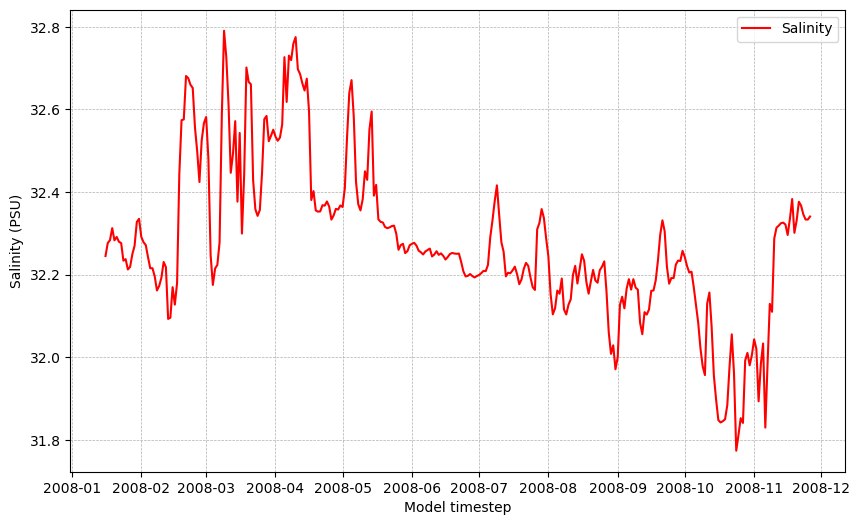

In [10]:
plt.figure(figsize=(10,6))
plt.plot(timestep_dates, salinity_values,'r',label='Salinity')
plt.ylabel('Salinity (PSU)')
plt.xlabel('Model timestep')
plt.legend()
plt.grid(linestyle='--',linewidth=0.5)
plt.show()

Here we can see that the temperature of the ocean in Alaska rises around June and fall in September, while salinity is higher around mid February to end mid May and decreases over the year until November where it rises again. When comparing against the temperature plot, the higher salinity seems to correlate to lower ocean temps, and lower salinity with warmer temps. This could be due to the melting of ice which introduces freshwater that causes the saltinity to decrease, while the colder temps allows for ice, meaning less freshwater.

## Looking at the model in warm vs cold season:
Difference between mid march and early september before the decline in ocean temperature.

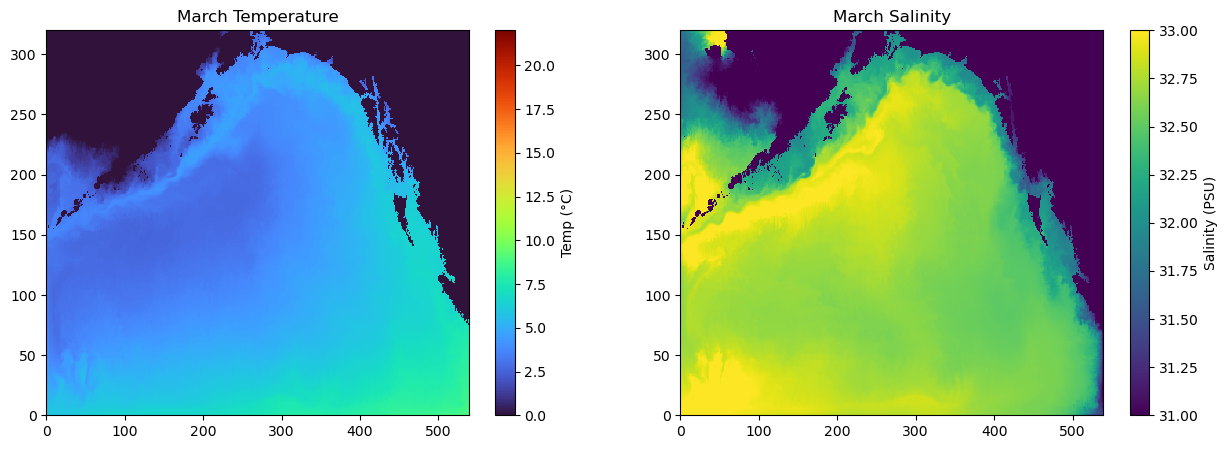

In [11]:
march_grid = np.fromfile(os.path.join(project_dir,'run','diags','TS_surf_daily_mean',
                                'TS_surf_daily_mean.0000021312.data'), '>f4')
march_grid = march_grid.reshape((2,n_rows,n_cols))

fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 
C1 = axes[0].pcolormesh(march_grid[0,:,:-1], cmap='turbo', vmin=0,vmax=22)
fig.colorbar(C1, ax=axes[0], orientation='vertical', label='Temp (°C)')
axes[0].set_title('March Temperature')

C2 = axes[1].pcolormesh(march_grid[1,:,:-1], cmap='viridis', vmin=31, vmax=33)
fig.colorbar(C2, ax=axes[1], orientation='vertical', label='Salinity (PSU)')
axes[1].set_title('March Salinity')

plt.show()

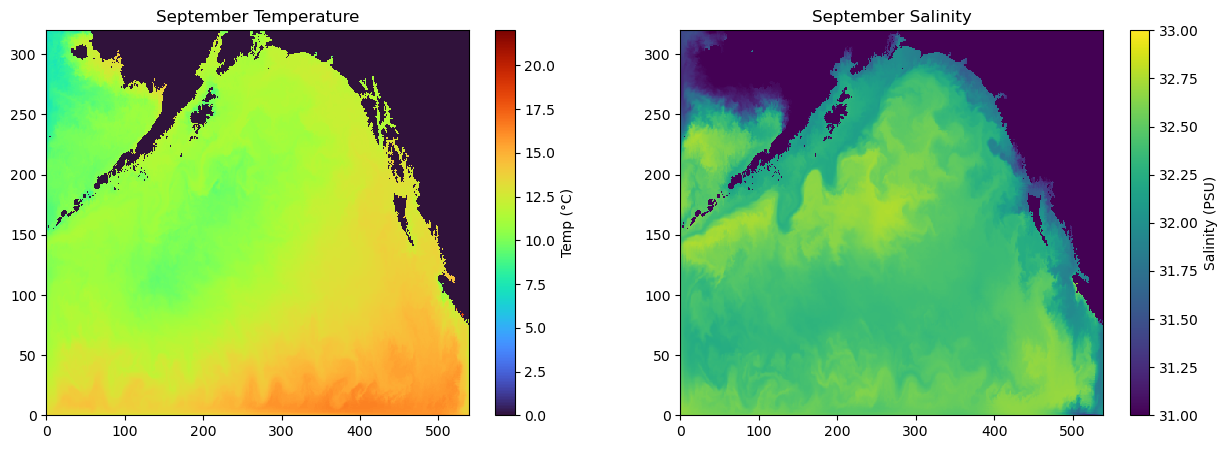

In [12]:
september_grid = np.fromfile(os.path.join(project_dir,'run','diags','TS_surf_daily_mean',
                                'TS_surf_daily_mean.0000069984.data'), '>f4')

september_grid = september_grid.reshape((2,n_rows,n_cols))
fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 
C1 = axes[0].pcolormesh(september_grid[0,:,:-1], cmap='turbo', vmin=0,vmax=22)
fig.colorbar(C1, ax=axes[0], orientation='vertical', label='Temp (°C)')
axes[0].set_title('September Temperature')

C2 = axes[1].pcolormesh(september_grid[1,:,:-1], cmap='viridis', vmin=31, vmax=33)
fig.colorbar(C2, ax=axes[1], orientation='vertical', label='Salinity (PSU)')
axes[1].set_title('September Salinity')

plt.show()

Just visualizing what's happening to salinity in warm ocean and colder ocean in Alaska.